In [1]:
import torch as tn
import torchtt as tntt
import TTCME
import matplotlib.pyplot as plt 
import scipy.integrate
import numpy as np
import datetime

tn.set_default_tensor_type(tn.DoubleTensor)

In [2]:
r1 = TTCME.ChemicalReaction(['mRNA','protein'],'mRNA->mRNA+protein', 0.015)
r2 = TTCME.ChemicalReaction(['mRNA','protein'],'mRNA->', 0.002)
r3 = TTCME.ChemicalReaction(['mRNA','protein'],'->mRNA', 0.1)
r4 = TTCME.ChemicalReaction(['mRNA','protein'],'protein->', 0.01)

rs = TTCME.ReactionSystem(['mRNA','protein'],[r1, r2, r3, r4])

N = [80,120] 

Att = rs.generatorTT(N)

p0 = TTCME.pdf.SingularPMF(N,[2,4])

Nt = 8
dT = 128

In [3]:
Asp = rs.generator_sparse(N)

res = scipy.integrate.solve_ivp(lambda t,y: Asp.dot(y), [0,dT*Nt],p0.dofs.numpy().flatten(),max_step=dT/10000)
Pt = res.y.reshape(N+[-1])
p_ref = Pt[:,:,-1]

In [12]:

print('Cheby...')
err_ch = []
refinements_ch = [2,3,4,6,8,10,12,14,16,18,20,22,24,28,32]

for nt in refinements_ch:
    integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=nt, epsilon = 1e-14, dt_max = 1000, method='cheby')

    p = p0.copy()
    for i in range(Nt):
        p.dofs = integrator.solve(p.dofs, dT, intervals = 1)
        # p.dofs = p.dofs.round(1e-14)
        
    err = np.max(np.abs(p.dofs.numpy()-p_ref)) / np.max(np.abs(p_ref))
    err_ch.append(err)
    print('nt ',nt,' error inf ',err)

Cheby...
nt  2  error inf  0.00608953043352169
nt  3  error inf  7.15441461537288e-05
nt  4  error inf  7.594163959912273e-07
nt  6  error inf  7.520706233116588e-11
nt  8  error inf  4.0480004175466136e-14
nt  10  error inf  3.122294895704559e-14
nt  12  error inf  2.424093273298263e-14
nt  14  error inf  4.4716283682200964e-14
nt  16  error inf  6.024930854022867e-14
nt  18  error inf  4.801116774299472e-14
nt  20  error inf  1.7494265370404938e-14
nt  22  error inf  5.758202144339563e-14
nt  24  error inf  2.267194032308084e-14
nt  28  error inf  7.358574402439387e-14
nt  32  error inf  4.173519810338757e-14


In [5]:

print('Implicit Euler...')
err_implicit = []
refinements_implicit = [16,32,64,128,256,512]

for nt in refinements_implicit:
    integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=nt, epsilon = 1e-9, dt_max = 1000, method='implicit-euler')

    p = p0.copy()
    for i in range(Nt):
        p.dofs = integrator.solve(p.dofs, dT, intervals = 1)
        
    err = np.max(np.abs(p.dofs.numpy()-p_ref)) / np.max(np.abs(p_ref))
    err_implicit.append(err)
    print('nt ',nt,' error inf ',err)

Implicit Euler...
nt  16  error inf  0.01962706354380693
nt  32  error inf  0.009900218602301343
nt  64  error inf  0.004970275008188685
nt  128  error inf  0.002489839575827229
nt  256  error inf  0.001246563152188908
nt  512  error inf  0.0006240498694003765


In [6]:

print('Crank Nicolson...')
err_cn = []
refinements_cn = [16,32,64,128,256,512]

for nt in refinements_cn:
    integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=nt, epsilon = 1e-11, dt_max = 1000, method='crank–nicolson')

    p = p0.copy()
    for i in range(Nt):
        p.dofs = integrator.solve(p.dofs, dT, intervals = 1)
        
    err = np.max(np.abs(p.dofs.numpy()-p_ref)) / np.max(np.abs(p_ref))
    err_cn.append(err)
    print('nt ',nt,' error inf ',err)

Crank Nicolson...
nt  16  error inf  0.00018992097928766298
nt  32  error inf  4.443181559742709e-05
nt  64  error inf  1.0756183808083408e-05
nt  128  error inf  2.6468247012110496e-06
nt  256  error inf  6.566926973277984e-07
nt  512  error inf  1.631605673805236e-07


In [7]:
print('Legendre...')
err_le = []
refinements_le = [2,6,8,10,12,14,16,18,20,22,24,28,32]

for nt in refinements_le:
    integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=nt, epsilon = 1e-14, dt_max = 1000, method='legendre')

    p = p0.copy()
    for i in range(Nt):
        p.dofs = integrator.solve(p.dofs, dT, intervals = 1)
        
    err = np.max(np.abs(p.dofs.numpy()-p_ref)) / np.max(np.abs(p_ref))
    err_le.append(err)
    print('nt ',nt,' error inf ',err)

Legendre...
nt  2  error inf  0.006089530433540047
nt  6  error inf  7.520070791190579e-11
nt  8  error inf  2.6494788672147175e-14
nt  10  error inf  4.3617988995269716e-14
nt  12  error inf  1.8200311954860743e-14
nt  14  error inf  5.318884269567062e-14
nt  16  error inf  3.294884060793755e-14
nt  18  error inf  1.623907144248351e-14
nt  20  error inf  4.848186546596526e-14
nt  22  error inf  2.133829677466432e-14
nt  24  error inf  2.698666945031076e-14
nt  28  error inf  4.6128376851112573e-14
nt  32  error inf  3.200744516199648e-14


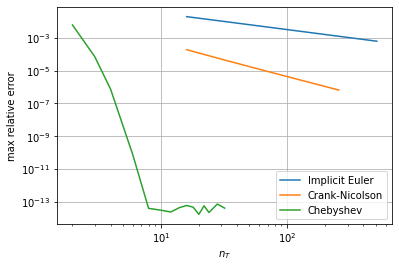

In [13]:
import tikzplotlib

plt.figure()
plt.loglog(refinements_implicit,err_implicit)
plt.loglog(refinements_cn[:-1],err_cn[:-1])
plt.loglog(refinements_ch[:],err_ch[:])
# plt.loglog(refinements_le[:],err_le[:])
plt.xlabel(r'$n_T$')
plt.ylabel(r'max relative error')
plt.grid()
plt.legend(['Implicit Euler','Crank-Nicolson','Chebyshev'])

tikzplotlib.save('convergence.tex')

In [9]:
print('Epsilon of the solver...')
err_eps = []
refinements_epsilon = 10.0 ** (-np.arange(1,11))
for eps in refinements_epsilon:
    integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=nt, epsilon = eps, dt_max = 100, method='cheby')

    p = p0.copy()
    for i in range(Nt):
        p.dofs = integrator.solve(p.dofs, dT, intervals = 1)
        
    err = np.max(np.abs(p.dofs.numpy()-p_ref)) / np.max(np.abs(p_ref))
    err_eps.append(err)
    print('epsilon ',eps,' error inf ',err)

Epsilon of the solver...
epsilon  0.1  error inf  0.13920786368934773
epsilon  0.01  error inf  0.06166528786944253
epsilon  0.001  error inf  0.004032151673176074
epsilon  0.0001  error inf  0.0003644917586719332
epsilon  1e-05  error inf  3.301606916845102e-05
epsilon  1e-06  error inf  7.071505839363787e-06
epsilon  1e-07  error inf  7.364854726032932e-07
epsilon  1e-08  error inf  7.89196041696142e-08
epsilon  1e-09  error inf  1.1616438851555716e-08
epsilon  1e-10  error inf  7.811649202661907e-10


In [10]:
print('Epsilon vs Nt ...')
refinements_epsilon_2 = 10.0 ** (-np.arange(1,13))
refinements_ch2 = [2,3,4,5,6,7,8]
err_eps_ch = []
for eps in refinements_epsilon_2:
    err_temp = []
    for nt in refinements_ch2:
        integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=nt, epsilon = eps, dt_max = 100, method='cheby')
        p = p0.copy()
        for i in range(Nt):
            p.dofs = integrator.solve(p.dofs, dT, intervals = 1)
        
        err = np.max(np.abs(p.dofs.numpy()-p_ref)) / np.max(np.abs(p_ref))
        err_temp.append(err)
        print('epsilon ',eps,' nt ',nt,' error inf ',err)
    err_eps_ch.append(err_temp)

Epsilon vs Nt ...
epsilon  0.1  nt  2  error inf  0.13014649695756175
epsilon  0.1  nt  3  error inf  0.047956196695452674
epsilon  0.1  nt  4  error inf  0.061498735773358626
epsilon  0.1  nt  5  error inf  0.1500631975777505
epsilon  0.1  nt  6  error inf  0.025018734273137548
epsilon  0.1  nt  7  error inf  0.029194369137809078
epsilon  0.1  nt  8  error inf  0.10729150039724078
epsilon  0.01  nt  2  error inf  0.026771518773931077
epsilon  0.01  nt  3  error inf  0.01103368918178554
epsilon  0.01  nt  4  error inf  0.003620723919975268
epsilon  0.01  nt  5  error inf  0.004807354242420211
epsilon  0.01  nt  6  error inf  0.0012604506144006065
epsilon  0.01  nt  7  error inf  0.01017611076802605
epsilon  0.01  nt  8  error inf  0.002781821183279981
epsilon  0.001  nt  2  error inf  0.005048386699493915
epsilon  0.001  nt  3  error inf  0.0018526500952424552
epsilon  0.001  nt  4  error inf  0.00029145778450376535
epsilon  0.001  nt  5  error inf  0.0003063527123294017
epsilon  0.001

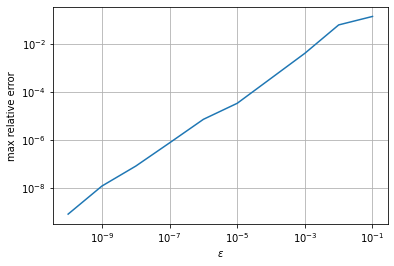

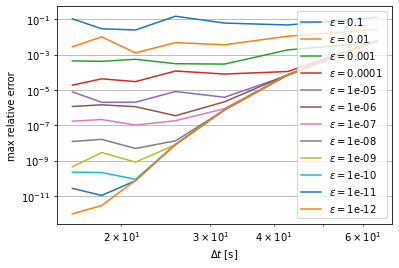

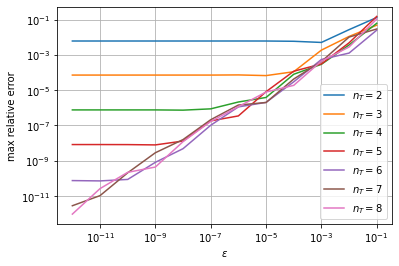

In [14]:
import tikzplotlib

plt.figure()
plt.loglog(refinements_epsilon,err_eps)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'max relative error')
plt.grid()
tikzplotlib.save('convergence_eps.tex')

plt.figure()
plt.loglog(dT/np.array(refinements_ch2),np.array(err_eps_ch).transpose())
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'max relative error')
plt.legend([r'$\epsilon=$'+str(eps) for eps in refinements_epsilon_2])
plt.grid()
tikzplotlib.save('convergence_eps_multiple.tex')

plt.figure()
plt.loglog(np.array(refinements_epsilon_2),np.array(err_eps_ch))
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'max relative error')
plt.legend([r'$n_T=$'+str(tmp)+'' for tmp in np.array(refinements_ch2)])
plt.grid()
tikzplotlib.save('convergence_Nt_multiple.tex')